In [41]:
import numpy as np
np.random.seed(42)
import matplotlib.pyplot as plt
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_validate
from sklearn.preprocessing import StandardScaler

#### Helper

In [42]:
def print_grid_cv_results(grid_result):
    print(
        f"Best model score: {grid_result.best_score_} "
        f"Best model params: {grid_result.best_params_} "
    )
    means = grid_result.cv_results_["mean_test_score"]
    stds = grid_result.cv_results_["std_test_score"]
    params = grid_result.cv_results_["params"]

    for mean, std, param in zip(means, stds, params):
        mean = round(mean, 4)
        std = round(std, 4)
        print(f"{mean} (+/- {2 * std}) with: {param}")

#### LOAD DATASET

In [43]:
cal_housing = fetch_california_housing()

x = cal_housing.data
y = cal_housing.target

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3)

#### NORMALIZE DATASET

In [44]:
scaler = StandardScaler()
scaler.fit(x_train)

x_train = scaler.transform(x_train)
x_test = scaler.transform(x_test)

#### Metrics

In [45]:
scoring_metrics = {
    'r2_score': make_scorer(r2_score)
}

#### LINEAR REGRESSION:

In [46]:
from sklearn.linear_model import LinearRegression

regr = LinearRegression()
cv_results = cross_validate(
    regr, x_train, y_train, cv=3, scoring=scoring_metrics
)
test_r2_score = cv_results['test_r2_score']

print(f"Mean R2: {np.mean(test_r2_score)}")

Mean R2: 0.6075224720706819


#### KNN REGRSSOR

In [47]:
from sklearn.neighbors import KNeighborsRegressor

params = {
    "n_neighbors": [i for i in range(2, 22, 2)]
}

regr = KNeighborsRegressor()

grid = GridSearchCV(regr, params, cv=3)
grid_result = grid.fit(x_train, y_train)

print_grid_cv_results(grid_result)

Best model score: 0.6784065739877719 Best model params: {'n_neighbors': 12} 
0.613 (+/- 0.0122) with: {'n_neighbors': 2}
0.6609 (+/- 0.0078) with: {'n_neighbors': 4}
0.6717 (+/- 0.0024) with: {'n_neighbors': 6}
0.6742 (+/- 0.0058) with: {'n_neighbors': 8}
0.6774 (+/- 0.0062) with: {'n_neighbors': 10}
0.6784 (+/- 0.0068) with: {'n_neighbors': 12}
0.6782 (+/- 0.0064) with: {'n_neighbors': 14}
0.6778 (+/- 0.0078) with: {'n_neighbors': 16}
0.6764 (+/- 0.0078) with: {'n_neighbors': 18}
0.6748 (+/- 0.0078) with: {'n_neighbors': 20}


#### RANDOM FOREST REGRESSOR

In [20]:
from sklearn.ensemble import RandomForestRegressor

params = {
    "n_estimators": [180, 220, 240],
    "max_depth": [8, 10, 12]
}

regr = RandomForestRegressor()

grid = GridSearchCV(regr, params, cv=3)
grid_result = grid.fit(x_train, y_train)

print_grid_cv_results(grid_result)

KeyboardInterrupt: 

#### GRADIENT BOOSTING REGRESSOR

In [15]:
from sklearn.ensemble import GradientBoostingRegressor

params = {
    "n_estimators": [180, 220, 240],
    "max_depth": [6, 7, 8],
    "learning_rate": [0.06, 0.07]
}

regr = GradientBoostingRegressor()

grid = GridSearchCV(regr, params, cv=3)
grid_result = grid.fit(x_train, y_train)

print_grid_cv_results(grid_result)

Best: 0.827245 using {'learning_rate': 0.06, 'max_depth': 7, 'n_estimators': 240}
0.821935 (0.003738) with: {'learning_rate': 0.06, 'max_depth': 6, 'n_estimators': 180}
0.824809 (0.003597) with: {'learning_rate': 0.06, 'max_depth': 6, 'n_estimators': 220}
0.825953 (0.003593) with: {'learning_rate': 0.06, 'max_depth': 6, 'n_estimators': 240}
0.825096 (0.002314) with: {'learning_rate': 0.06, 'max_depth': 7, 'n_estimators': 180}
0.826515 (0.002462) with: {'learning_rate': 0.06, 'max_depth': 7, 'n_estimators': 220}
0.827245 (0.002191) with: {'learning_rate': 0.06, 'max_depth': 7, 'n_estimators': 240}
0.822520 (0.003168) with: {'learning_rate': 0.06, 'max_depth': 8, 'n_estimators': 180}
0.823797 (0.003568) with: {'learning_rate': 0.06, 'max_depth': 8, 'n_estimators': 220}
0.824027 (0.003315) with: {'learning_rate': 0.06, 'max_depth': 8, 'n_estimators': 240}
0.823278 (0.003156) with: {'learning_rate': 0.07, 'max_depth': 6, 'n_estimators': 180}
0.824295 (0.003439) with: {'learning_rate': 0.07

#### SVM REGRESSOR:

In [17]:
from sklearn.svm import SVR

params = {
    "kernel": ["linear", "rbf", "sigmoid"]
}

regr = SVR()

grid = GridSearchCV(regr, params, cv=3)
grid_result = grid.fit(x_train, y_train)

print_grid_cv_results(grid_result)

Best: 0.727710 using {'kernel': 'rbf'}
-1.537577 (3.003287) with: {'kernel': 'linear'}
0.727710 (0.004329) with: {'kernel': 'rbf'}
-3709.164984 (105.770897) with: {'kernel': 'sigmoid'}


#### BEST MODEL:

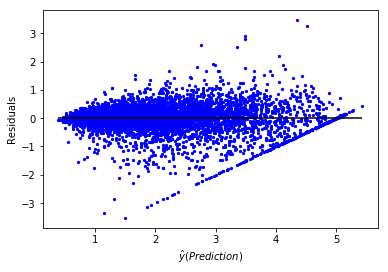

In [19]:
regr = GradientBoostingRegressor(
    n_estimators=240,
    max_depth=7,
    learning_rate=0.06
)
regr.fit(x_train, y_train)
y_pred = regr.predict(x_test)

mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"MSE: {mse}")
print(f"MAE: {mae}")
print(f"R2: {r2}")

#### Residual Plot of Best Model

In [ ]:
def plot_residuals(regr, x_train, y_train, x_test, y_test):
    y_pred_train = regr.predict(x_train)
    y_pred_test = regr.predict(x_test)
    
    min_val = min(np.min(y_pred_train), np.min(y_pred_test))
    max_val = max(np.max(y_pred_train), np.max(y_pred_test))
    
    plt.scatter(y_pred_train, y_pred_train - y_train, color="blue")
    plt.scatter(y_pred_test, y_pred_test - y_test, color="red")
    plt.hlines(y=0, xmin=min_val, xmax=max_val)
    plt.legend(["Train", "Test"])
    plt.show()

In [ ]:
plot_residuals(regr, x_train, y_train, x_test, y_test)